In [2]:
import json
import random
import itertools
import pandas as pd
import networkx as nx
from collections import Counter, OrderedDict, defaultdict

import matplotlib.pyplot as plt
from pyvis.network import Network

import pytextrank
import spacy

In [3]:
with open("./data/subtask3-coreference/en-train.json") as fp:
    entries = fp.readlines()

In [4]:
data = []
for entry in entries:
    data.append(json.loads(entry))

In [7]:
sentence_no_list = []
event_clusters_list = []

for d in data:
    sentence_no_list += d['sentence_no']
    event_clusters_list += d['event_clusters']

In [8]:
print("The maximum number of sentence_no: %d" % max(sentence_no_list))

The maximum number of sentence_no: 90


In [9]:
def get_event_clusters_comb(clusters_list, comb_elements_num):
    """Decompose the clusters and recompose them with at most comb_elements_num elements
    """
    event_clusters_comb = []
    for e in clusters_list:
        if len(e) >= comb_elements_num:
            event_clusters_comb += itertools.combinations(e, comb_elements_num)
        else:
            event_clusters_comb += (e,)

    event_clusters_counter = Counter(map(tuple, event_clusters_comb)).most_common()
    return event_clusters_counter

In [15]:
def get_cooccurrences(event_clusters_list, sentence_no_range=range(1,91)):
    # occurrences = OrderedDict((sn, OrderedDict((sn, 0) for sn in sentence_no_range)) for sn in sentence_no_range)
    results = pd.DataFrame(index=sentence_no_range, columns=sentence_no_range)
    results = results.fillna(0)

    # Find the co-occurrences:
    for l in event_clusters_list:
        for i in range(len(l)):
            for item in l[:i] + l[i + 1:]:
                # occurrences[l[i]][item] += 1
                _tmp = results.at[l[i], item] + 1
                results.at[l[i], item] = _tmp
    return results

In [28]:
len(set(sentence_no_list))

62

In [16]:
cooccurrence_df = get_cooccurrences(event_clusters_list)
cooccurrence_df

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
1,0,218,155,128,96,91,72,57,48,40,...,0,0,0,0,0,0,0,0,0,0
2,218,0,123,88,69,65,42,41,32,32,...,1,0,0,0,0,0,0,0,0,1
3,155,123,0,98,68,52,35,27,26,23,...,0,0,0,0,0,0,0,0,0,0
4,128,88,98,0,65,51,29,31,31,23,...,1,0,0,0,0,0,0,0,0,1
5,96,69,68,65,0,43,21,24,20,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from icecream import ic
ic.disable()

In [31]:
sentence_no_counter = dict(Counter(sentence_no_list))

for i in sentence_no_counter.keys():
    ic(i, sentence_no_counter[i])
    cooccurrence_df[i][i] = sentence_no_counter[i]

In [38]:
import seaborn as sns
%matplotlib inline


In [44]:
cooccurrence_df.loc[:20,:20]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,396,218,155,128,96,91,72,57,48,40,37,42,35,26,27,11,19,7,6,5
2,218,296,123,88,69,65,42,41,32,32,25,26,25,22,26,8,16,8,3,2
3,155,123,247,98,68,52,35,27,26,23,21,25,18,13,19,4,10,7,2,2
4,128,88,98,210,65,51,29,31,31,23,16,17,12,12,10,3,7,5,3,1
5,96,69,68,65,170,43,21,24,20,16,19,15,12,9,12,3,6,2,0,1
6,91,65,52,51,43,183,44,26,22,14,16,17,12,13,10,3,5,3,2,0
7,72,42,35,29,21,44,139,30,22,17,10,18,10,7,9,3,6,1,1,4
8,57,41,27,31,24,26,30,113,26,20,14,18,12,13,10,5,9,3,3,4
9,48,32,26,31,20,22,22,26,107,27,11,16,10,4,9,3,7,4,1,1
10,40,32,23,23,16,14,17,20,27,87,22,18,12,9,12,4,9,3,4,1


<AxesSubplot:>

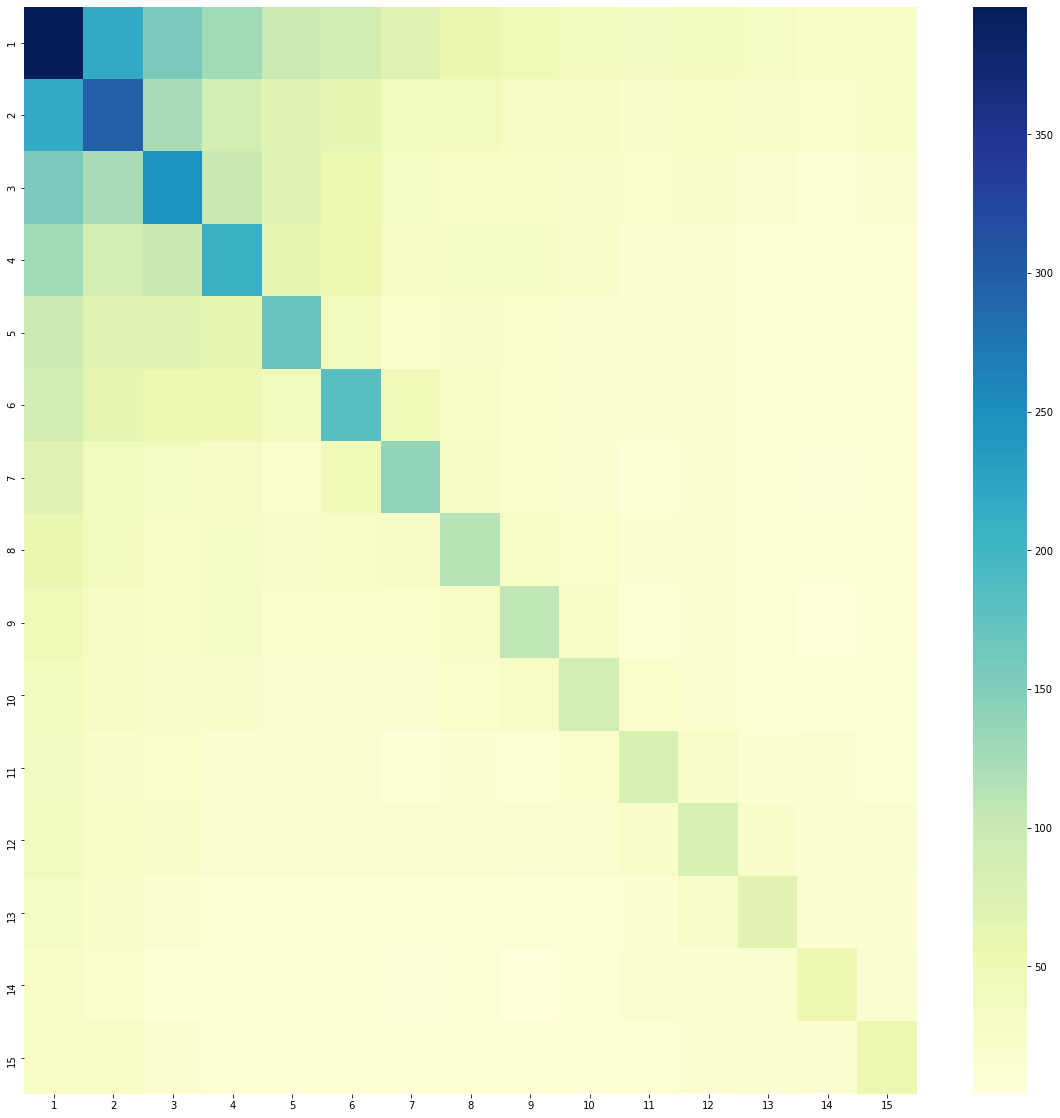

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))   

sns.heatmap(cooccurrence_df.loc[:15,:15], cmap="YlGnBu")


In [16]:
# Find if there are some events always alone (have no connection with others)
occur_alone = cooccurrence_df[cooccurrence_df==0].dropna().index.to_list()
occur_alone

[42,
 45,
 48,
 49,
 50,
 51,
 52,
 53,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 88,
 89]

In [17]:
bi_comb = get_event_clusters_comb(event_clusters_list, 2)
bi_comb_dict = dict(bi_comb)
for k in occur_alone:
    bi_comb_dict.pop(k, None)

In [18]:
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in bi_comb_dict.items():
    if len(k) >= 2 and v > 0:
        G.add_edge(k[0], k[1], weight=(v * 20))


In [19]:
g = Network(height=800, width=800, notebook=True)
# g.toggle_hide_edges_on_drag(True)
g.barnes_hut()
g.from_nx(G)
g.save_graph("subtask3_event_clusters.html")


In [20]:
# Does not work in PyCharm, but should work in a native browser
from IPython.display import IFrame

# IFrame("subtask3_event_clusters.html", width=900, height=900)

In [21]:
supplement_alone = [[85,86,87], [57,64]]
for sp in supplement_alone:
    occur_alone += sp
    occur_alone = list(set(occur_alone))


# Keywords analysis

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline


In [23]:
# Create new corpus with keys=event no
sentence_no_list_filtered = list(set(sentence_no_list) - set(occur_alone))
corpus_event = defaultdict(list)

for d in data:
    for i, v in enumerate(d['sentence_no']):
        if v in sentence_no_list_filtered:
            corpus_event[v].append(d['sentences'][i])



In [24]:
# Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
# need to put into lower case
months=['January','February','March', 'April','May','June','July','August','September','October','November','December']
# need to put into lower case

# add these lines
stop_words = set(stopwords.words('english'))
lowercase_days = {item.lower() for item in days}
lowercase_months = {item.lower() for item in months}

exclusion_set = lowercase_days.union(lowercase_months).union(stop_words)


[nltk_data] Downloading package stopwords to /home/he/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
vectorizer_features = defaultdict()
corpus_event_features = defaultdict(list)
for n, c in corpus_event.items():
    vectorizer = TfidfVectorizer(stop_words=exclusion_set ,ngram_range=(1, 1), min_df=0.05, token_pattern=r'(?ui)\b\w*[a-zA-Z]{2,}\b')
    truncate = TruncatedSVD(n_components=6)
    X = vectorizer.fit_transform(c)
    # X = truncate.fit_transform(X)
    corpus_event_features[n] = X
    vectorizer_features[n] = vectorizer

In [26]:
vectorizer_features[1].transform(corpus_event[1])

<396x37 sparse matrix of type '<class 'numpy.float64'>'
	with 1414 stored elements in Compressed Sparse Row format>

In [27]:
corpus_event[1][0]

'Shimoga : Pakistan criticised for ceasefire violation along border October 12 , 2014 00:00 IST ABVP asks Union government to give a fitting reply Members of the Akhil Bharatiya Vidyarthi Parishad ( ABVP ) on Saturday staged a protest here condemning the violation of ceasefire by Pakistan along the international border .'

In [28]:
vectorizer = TfidfVectorizer(stop_words=exclusion_set ,ngram_range=(1, 2), min_df=0.05, token_pattern=r'(?ui)\b\w*[a-z]{2,}\b')
truncate = TruncatedSVD(n_components=6)
X = vectorizer.fit_transform(c)
# X = truncate.fit_transform(X)
corpus_event_features[n] = X

In [29]:
test_text = 'Shimoga : Pakistan criticised for ceasefire violation along border October 12 , 2014 00:00 IST ABVP asks Union government to give a fitting reply Members of the Akhil Bharatiya Vidyarthi Parishad ( ABVP ) on Saturday staged a protest here condemning the violation of ceasefire by Pakistan along the international border .'

nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")

doc = nlp(test_text)
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)


IST ABVP
0.16377665735912927 1
[IST ABVP]
ceasefire violation
0.1519767812161022 1
[ceasefire violation]
ABVP
0.14073976493981252 1
[ABVP]
Union government
0.13336969779995209 1
[Union government]
border
0.12198244316916161 1
[border]
ceasefire
0.1092801608852183 1
[ceasefire]
the Akhil Bharatiya Vidyarthi Parishad
0.10200836455891027 1
[the Akhil Bharatiya Vidyarthi Parishad]
Parishad
0.09995459243907005 1
[Parishad]
Saturday
0.09983737344951303 2
[Saturday, Saturday]
Pakistan
0.09181334763193816 4
[Pakistan, Pakistan, Pakistan, Pakistan]
the Akhil Bharatiya Vidyarthi
0.08847661975294056 1
[the Akhil Bharatiya Vidyarthi]
a fitting reply Members
0.08847082727605284 1
[a fitting reply Members]
the international border
0.07330396325534541 1
[the international border]
the violation
0.0547321355340643 1
[the violation]
a protest
0.046077938220513245 1
[a protest]
Shimoga
0.03872983346207417 1
[Shimoga]
October 12 , 2014
0.026646917878161588 1
[October 12 , 2014]
